In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create function to prepare connection to database
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

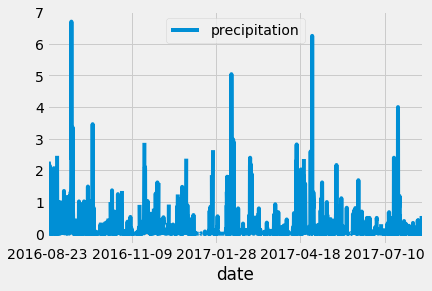

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
# prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=["date", "precipitation"])
df.set_index(df["date"], inplace=True)
#print(df)
#print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station? 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

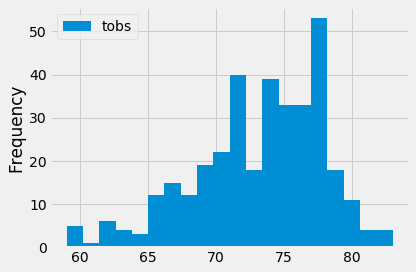

In [15]:
# Choose the station with the highest number of temperature observations.
#session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=["tobs"])
#print(df)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=20)
plt.tight_layout()

# When bin=5, you get a vague idea about temp. You can assume there are ~300 days/year that are >= 70.
# When bin=20, you get more precise data and you can see about haw many days/year each temp. has. 

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).all()
min_avg_max_temps = (calc_temps("2015-01-01", "2019-12-31"))
print(min_avg_max_temps)

[(56.0, 87.0, 74.03199477636305)]


# Challenge

In [46]:
# Identify key statistical data across all of the stations and years using the describe() function.
all_years_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Measurement.station).all()
# Create a dataframe for all data points
all_years_df = pd.DataFrame(all_years_results, columns=["date", "precipitation", "tobs", "stations"])

all_years_df


all_years_df.describe()

,precipitation,tobs
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


In [56]:
#Identify key statistical data in June across all of the stations and years using the describe() function.
june_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date.contains("-06-")).all()
# Create a dataframe for all June data points across all years and stations
june_df = pd.DataFrame(june_results, columns = ["Date", "Precipitation", "Temperature"])
june_df.head(10)

,Date,Precipitation,Temperature
0,2010-06-01,0.00,78.0
1,2010-06-02,0.01,76.0
2,2010-06-03,0.00,78.0
3,2010-06-04,0.00,76.0
4,2010-06-05,0.00,77.0
5,2010-06-06,0.00,78.0
6,2010-06-07,0.00,77.0
7,2010-06-08,0.00,78.0
8,2010-06-09,0.00,78.0
9,2010-06-10,0.00,79.0


In [54]:
june_df.describe()

,Precipitation,Temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [49]:
#Identify key statistical data in December across all of the stations and years using the describe() function.
dec_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date.contains("-12-")).all()
# Create a dataframe for all June data points across all years and stations
dec_df = pd.DataFrame(dec_results, columns = ["Date", "Precipitation", "Temperature"])
dec_df.head(10)

,Date,Precipitation,Temperature
0,2010-12-01,0.04,76.0
1,2010-12-03,0.00,74.0
2,2010-12-04,0.00,74.0
3,2010-12-06,0.00,64.0
4,2010-12-07,0.00,64.0
5,2010-12-08,0.00,67.0
6,2010-12-09,0.00,77.0
7,2010-12-10,1.58,66.0
8,2010-12-11,0.77,69.0
9,2010-12-12,0.00,68.0


In [50]:
dec_df.describe()

,Precipitation,Temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


# Written Analysis and Findings

Information based on comparing the months June and December in Oahu, Hawaii across all years (01/01/2010 – 08/23/2017), and across all nine weather stations.  
 -  Over the years there are 1574 precipitation points for June, and 1405 precipitation points for December. Similarly, there are 1700 temperature observations (tobs) for June, and 1517 tobs for December. This likely because there is no station data for December of 2017, as the dataset we are using ends August 23, 2017.    
 - When looking at precipitation, June’s mean (0.136360), and median (0.02) are lower than December’s mean (0.216819), and median (0.03), which would be expected, as December typically experiences more rainfall in Oahu. 
 - December experienced a higher maximum precipitation (6.42) and standard deviation (0.541) compared to June with 4.43 and 0.3357, respectively. Both June and December had a minimum precipitation of zero.
 - When looking at temperature observations (tobs), December’s mean (71.04), and median (71.0) are lower than June’s mean (74.94), and median (75.0), which would be expected, as June typically experiences warmer weather in Oahu. 
 - June experienced a higher maximum, minimum temperatures, and standard deviation (85.0, 64.0, and 3.26, respectively) compared to December that had a maximum of 83.0, minimum of 56.0, and a standard deviation of 3.75. 

# Recommendations

1. In order to have more reliable data, I would recommend using an updated database that includes the month of December 2017. This would likely decrease the disparity in number of data points for precipitation and temperature.    
2. Additionally, since we are looking to open the Ice Cream Store/Surf Shack in the near future (2020), it would be good to have current precipitation and temperature data. Weather patterns can greatly vary in three years, so in order to make the most informed decision, I would recommend pulling weather data from a weather API, in addition to the stations we are currently looking at. Building on this, we should be looking at more months throughout the years, possibly breaking it up into seasons. This will be able to tell us if there are other months that we should expect greater precipiation and lower temperatures that would possibly hinder our business success.  
3. To make things easier for our potentail investors, it would be a good idea to include visualizations, such as a histogram that compares weather between June and December. We could also plot a line graph displaying the temperature throughout the years, to see if we could project weather patterns for future years.  